In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


<h3>Load data obtained in the analysis part of the project</h3>

In [2]:
greater_paris_coords_all_boroughs_df = pd.read_csv('./Data/greater_paris_coords_all_boroughs_df.csv')

In [3]:
greater_paris_coords_all_boroughs_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,75001,Le Louvre,Saint-Germain-l'Auxerrois,48.859696,2.340633
1,75001,Le Louvre,Les Halles,48.862157,2.344796
2,75001,Le Louvre,Le Palais-Royal,48.863585,2.336204
3,75001,Le Louvre,La Place-Vendôme,48.867322,2.329483
4,75002,La Bourse,Gaillon,48.869135,2.332909


In [4]:
greater_paris_venues_df = pd.read_csv('./Data/greater_paris_venues_df.csv')

In [5]:
greater_paris_venues_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Saint-Germain-l'Auxerrois,48.859696,2.340633,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza
1,Saint-Germain-l'Auxerrois,48.859696,2.340633,Place du Louvre,48.859841,2.340822,Plaza
2,Saint-Germain-l'Auxerrois,48.859696,2.340633,Coffee Crêpes,48.858841,2.340802,Coffee Shop
3,Saint-Germain-l'Auxerrois,48.859696,2.340633,Église Saint-Germain l'Auxerrois,48.859887,2.340617,Church
4,Saint-Germain-l'Auxerrois,48.859696,2.340633,Le Fumoir,48.860341,2.340647,Cocktail Bar


<h3>Number of unique categories of venues in Greater Paris</h3>

In [6]:
print('There are {} unique categories.'.format(len(greater_paris_venues_df['Venue Category'].unique())))

There are 421 unique categories.


<h3>Analyze Each Neighborhood</h3>

In [7]:
# one hot encoding
greater_paris_onehot = pd.get_dummies(greater_paris_venues_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
greater_paris_onehot['Neighborhood'] = greater_paris_venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [greater_paris_onehot.columns[-1]] + list(greater_paris_onehot.columns[:-1])
greater_paris_onehot = greater_paris_onehot[fixed_columns]

greater_paris_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,Airport Tram,Alsatian Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,Auvergne Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Basque Restaurant,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Breton Restaurant,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burgundian Restaurant,Burmese Restaurant,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Casino,Castle,Cemetery,Ch'ti Restaurant,Champagne Bar,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,City,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Conference,Construction & Landscaping,Convenience Store,Convention Center,Corsican Restaurant,Cosmetics Shop,Costume Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Rink,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Inn,Insurance Office,Irish Pub,Island,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Jiangxi Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Lyonese Bouchon,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Newsstand,Night Market,Nightclub,Noodle House,Norman Restaurant,Notary,Office,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great

<h3>Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category</h3>

In [8]:
greater_paris_grouped = greater_paris_onehot.groupby('Neighborhood').mean().reset_index()
greater_paris_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,Airport Tram,Alsatian Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,Auvergne Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Basque Restaurant,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Breton Restaurant,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burgundian Restaurant,Burmese Restaurant,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Casino,Castle,Cemetery,Ch'ti Restaurant,Champagne Bar,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,City,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Conference,Construction & Landscaping,Convenience Store,Convention Center,Corsican Restaurant,Cosmetics Shop,Costume Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Rink,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Inn,Insurance Office,Irish Pub,Island,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Jiangxi Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Lyonese Bouchon,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Newsstand,Night Market,Nightclub,Noodle House,Norman Restaurant,Notary,Office,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great

We can see that the resulting dataframe is very sparse most of the value being 0, which is logical since we have 421 unique venue categories which are, of course, not present in all the neighborhoods.

<h3>Let's print 10 neighborhood along with the top 5 most common venues</h3>

In [26]:
num_top_venues = 5

for hood in greater_paris_grouped['Neighborhood'].head(10):
    print("----"+hood+"----")
    temp = greater_paris_grouped[greater_paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ablis----
                   venue  freq
0     Photography Studio   1.0
1      Accessories Store   0.0
2     Persian Restaurant   0.0
3  Performing Arts Venue   0.0
4       Pedestrian Plaza   0.0


----Ablon-sur-Seine----
               venue  freq
0               Bank  0.25
1           Pharmacy  0.25
2      Train Station  0.25
3              Hotel  0.25
4  Accessories Store  0.00


----Achères----
                venue  freq
0  Italian Restaurant   0.2
1         Sports Club   0.2
2           Locksmith   0.2
3               Beach   0.2
4               Plaza   0.2


----Aigremont----
                 venue  freq
0  Sporting Goods Shop  0.25
1             Pharmacy  0.25
2          Golf Course  0.25
3            Roof Deck  0.25
4    Accessories Store  0.00


----Alfortville----
                       venue  freq
0                Flea Market  0.07
1                Supermarket  0.07
2       Caribbean Restaurant  0.07
3                       Park  0.07
4  Middle Eastern Restaurant  0.07


<h3>Put most common venues in Pandas dataframe</h3>

In [10]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [11]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = greater_paris_grouped['Neighborhood']

for ind in np.arange(greater_paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(greater_paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ablis,Photography Studio,Zoo Exhibit,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
1,Ablon-sur-Seine,Bank,Train Station,Hotel,Pharmacy,Zoo Exhibit,Falafel Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service
2,Achères,Sports Club,Locksmith,Italian Restaurant,Plaza,Beach,Farm,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service
3,Aigremont,Sporting Goods Shop,Golf Course,Pharmacy,Roof Deck,Falafel Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service
4,Alfortville,Park,Restaurant,Music Venue,Flea Market,Supermarket,Middle Eastern Restaurant,Bus Stop,Outdoor Sculpture,Bakery,Caribbean Restaurant


<h3>Cluster Neighborhoods</h3>

In [12]:
greater_paris_grouped_clustering = greater_paris_grouped.drop('Neighborhood', 1)

<h3>Let us also use a dendrogram to determine the optimal number of clusters</h3>

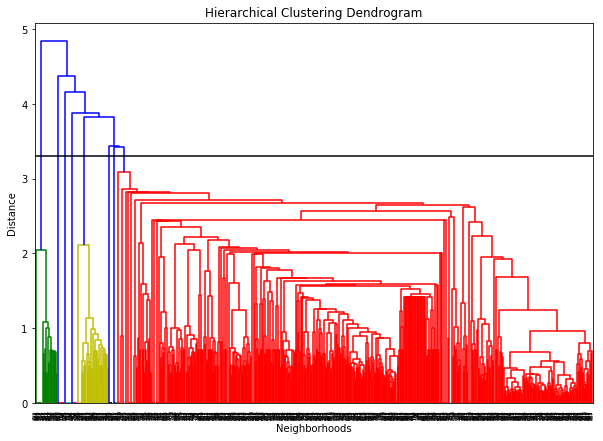

In [13]:
import scipy.cluster.hierarchy as shc

data = greater_paris_grouped_clustering
plt.figure(figsize=(10, 7))   
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Neighborhoods')
plt.ylabel('Distance')
plt.axhline(y=3.3, c='k')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

If we draw a horizontal line at approximately 3.5, we get 8 clusters

In [14]:
# set number of clusters
kclusters = 8

greater_paris_grouped_clustering = greater_paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(greater_paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:50] 

array([1, 1, 1, 1, 1, 1, 1, 7, 1, 5, 6, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 4, 1, 7, 1, 3, 1, 5, 1, 1, 1, 4, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

<h3>Visualize clusters</h3>

In [15]:
address = "75000, Paris, France"

geolocator = Nominatim(user_agent="paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566101, 2.3514992.


<h3>Create a sorted neighborhoods dataframe</h3>

In [16]:
# add clustering labels
#neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head()
print(neighborhoods_venues_sorted.shape)

greater_paris_merged = greater_paris_coords_all_boroughs_df

# merge to add latitude/longitude for each neighborhood
greater_paris_merged = pd.merge(greater_paris_coords_all_boroughs_df, neighborhoods_venues_sorted, how='inner', on='Neighborhood')
greater_paris_merged.head()

(751, 12)


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75001,Le Louvre,Saint-Germain-l'Auxerrois,48.859696,2.340633,1,French Restaurant,Plaza,Café,Hotel,Bakery,Bar,Pizza Place,Clothing Store,Wine Bar,Italian Restaurant
1,75001,Le Louvre,Les Halles,48.862157,2.344796,1,French Restaurant,Pizza Place,Café,Italian Restaurant,Bar,Bakery,Wine Bar,Restaurant,Cocktail Bar,Chinese Restaurant
2,75001,Le Louvre,Le Palais-Royal,48.863585,2.336204,1,French Restaurant,Hotel,Café,Japanese Restaurant,Plaza,Coffee Shop,Udon Restaurant,Cosmetics Shop,Bar,Theater
3,75001,Le Louvre,La Place-Vendôme,48.867322,2.329483,1,Hotel,French Restaurant,Chocolate Shop,Japanese Restaurant,Hotel Bar,Boutique,Bookstore,Pastry Shop,Jewelry Store,Cocktail Bar
4,75002,La Bourse,Gaillon,48.869135,2.332909,1,Hotel,French Restaurant,Japanese Restaurant,Sandwich Place,Jewelry Store,Plaza,Italian Restaurant,Cocktail Bar,Pastry Shop,Theater


In [17]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
print(colors_array)
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(greater_paris_merged['Latitude'], greater_paris_merged['Longitude'], greater_paris_merged['Neighborhood'], greater_paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.17647059e-01 4.29120609e-01 9.75511968e-01 1.00000000e+00]
 [7.25490196e-02 7.82927610e-01 9.00586702e-01 1.00000000e+00]
 [3.54901961e-01 9.74138602e-01 7.82927610e-01 1.00000000e+00]
 [6.45098039e-01 9.74138602e-01 6.22112817e-01 1.00000000e+00]
 [9.27450980e-01 7.82927610e-01 4.34676422e-01 1.00000000e+00]
 [1.00000000e+00 4.29120609e-01 2.19946358e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


In [19]:
map_clusters.save('map_clusters.html')

<h2>Examine Clusters</h2>

<h3>Cluster 0</h3>

In [19]:
greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 0, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]].head(10)

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
87,77124,Seine-et-Marne,Crégy-lès-Meaux,0,Restaurant,Zoo Exhibit,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
117,77170,Seine-et-Marne,Coubert,0,Restaurant,Zoo Exhibit,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
247,77910,Seine-et-Marne,Varreddes,0,Restaurant,Zoo Exhibit,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
272,78125,Yvelines,Poigny-la-Forêt,0,Bistro,Restaurant,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
274,78130,Yvelines,Chapet,0,Restaurant,Zoo Exhibit,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
308,78320,Yvelines,La Verrière,0,Concert Hall,Restaurant,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
361,78640,Yvelines,Neauphle-le-Vieux,0,Restaurant,Zoo Exhibit,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
397,78910,Yvelines,Orvilliers,0,Restaurant,Zoo Exhibit,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
456,91410,Essonne,Corbreuse,0,Restaurant,Business Service,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
470,91490,Essonne,Milly-la-Forêt,0,Restaurant,Zoo Exhibit,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit


### In Cluster 0 the majority of venues are Restaurants without specifying the type of cuisine

<h3>Cluster 1</h3>

In [18]:
greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 1, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]].head(10)

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75001,Le Louvre,Saint-Germain-l'Auxerrois,1,French Restaurant,Plaza,Café,Hotel,Bakery,Bar,Pizza Place,Clothing Store,Wine Bar,Italian Restaurant
1,75001,Le Louvre,Les Halles,1,French Restaurant,Pizza Place,Café,Italian Restaurant,Bar,Bakery,Wine Bar,Restaurant,Cocktail Bar,Chinese Restaurant
2,75001,Le Louvre,Le Palais-Royal,1,French Restaurant,Hotel,Café,Japanese Restaurant,Plaza,Coffee Shop,Udon Restaurant,Cosmetics Shop,Bar,Theater
3,75001,Le Louvre,La Place-Vendôme,1,Hotel,French Restaurant,Chocolate Shop,Japanese Restaurant,Hotel Bar,Boutique,Bookstore,Pastry Shop,Jewelry Store,Cocktail Bar
4,75002,La Bourse,Gaillon,1,Hotel,French Restaurant,Japanese Restaurant,Sandwich Place,Jewelry Store,Plaza,Italian Restaurant,Cocktail Bar,Pastry Shop,Theater
5,75002,La Bourse,Vivienne,1,French Restaurant,Japanese Restaurant,Hotel,Bistro,Italian Restaurant,Wine Bar,Café,Pastry Shop,Bar,Ramen Restaurant
6,75002,La Bourse,Le Mail,1,French Restaurant,Wine Bar,Cocktail Bar,Thai Restaurant,Italian Restaurant,Burger Joint,Bar,Bakery,Hotel,Indian Restaurant
7,75002,La Bourse,Bonne-Nouvelle,1,Pizza Place,Hotel,French Restaurant,Bar,Wine Bar,Burger Joint,Cocktail Bar,Italian Restaurant,Turkish Restaurant,Theater
8,75003,Le Temple,Les Arts-et-Métiers,1,French Restaurant,Hotel,Japanese Restaurant,Chinese Restaurant,Cocktail Bar,Italian Restaurant,Restaurant,Café,Art Gallery,Bar
9,75003,Le Temple,Les Enfants-Rouges,1,French Restaurant,Art Gallery,Bistro,Café,Italian Restaurant,Wine Bar,Boutique,Japanese Restaurant,Burger Joint,Sandwich Place


#### In Cluster 1, the majority of venues are French Restaurants and other catering facilities, it is by far the largest cluster

<h3>Cluster 2</h3>

In [20]:
greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 2, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]].head(10)

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,77100,Seine-et-Marne,Nanteuil-lès-Meaux,2,Supermarket,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
86,77120,Seine-et-Marne,Mouroux,2,Supermarket,Inn,Conference,Optical Shop,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space
105,77150,Seine-et-Marne,Lésigny,2,Scenic Lookout,Bistro,Supermarket,Zoo Exhibit,Farm,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space
123,77181,Seine-et-Marne,Le Pin,2,Construction & Landscaping,Supermarket,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
147,77260,Seine-et-Marne,Sept-Sorts,2,Shopping Mall,Supermarket,Zoo Exhibit,Farm,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
157,77350,Seine-et-Marne,Le Mée-sur-Seine,2,Supermarket,Train Station,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
176,77430,Seine-et-Marne,Champagne-sur-Seine,2,Automotive Shop,Supermarket,Plaza,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
190,77480,Seine-et-Marne,Mousseaux-lès-Bray,2,Supermarket,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
202,77540,Seine-et-Marne,Rozay-en-Brie,2,Rental Car Location,Supermarket,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space
208,77570,Seine-et-Marne,Château-Landon,2,Pharmacy,Hotel,Supermarket,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service


### In Cluster 2, the majority of venues are Supermarkets

<h3>Cluster 3</h3>

In [21]:
greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 3, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]].head(10)

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
103,77144,Seine-et-Marne,Chalifert,3,Hotel,Pizza Place,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
139,77230,Seine-et-Marne,Villeneuve-sous-Dammartin,3,Gas Station,Hotel,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
167,77400,Seine-et-Marne,Dampmart,3,Hotel,Garden,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space
170,77400,Seine-et-Marne,Saint-Thibault-des-Vignes,3,Japanese Restaurant,Hotel,Pizza Place,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service
173,77410,Seine-et-Marne,Gressy,3,Hotel,Zoo Exhibit,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
175,77420,Seine-et-Marne,Champs-sur-Marne,3,Hotel,River,Pizza Place,Bar,Coffee Shop,French Restaurant,Plaza,Zoo Exhibit,Factory,Fabric Shop
205,77560,Seine-et-Marne,Augers-en-Brie,3,Hotel,Zoo Exhibit,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
212,77580,Seine-et-Marne,Sancy,3,Hotel,Zoo Exhibit,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
246,77910,Seine-et-Marne,Germigny-l'Évêque,3,French Restaurant,Hotel,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space
255,77990,Seine-et-Marne,Mauregard,3,Hotel,Zoo Exhibit,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit


### In Cluster 3, the majority of venues are Hotels

<h3>Cluster 4</h3>

In [22]:
greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 4, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]].head(10)

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
99,77135,Seine-et-Marne,Pontcarré,4,French Restaurant,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
125,77184,Seine-et-Marne,Émerainville,4,Auto Workshop,French Restaurant,Furniture / Home Store,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
130,77210,Seine-et-Marne,Avon,4,French Restaurant,Outdoors & Recreation,Zoo Exhibit,Farmers Market,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
163,77390,Seine-et-Marne,Crisenoy,4,French Restaurant,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
187,77470,Seine-et-Marne,Montceaux-lès-Meaux,4,French Restaurant,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
222,77630,Seine-et-Marne,Barbizon,4,French Restaurant,Creperie,Art Gallery,Zoo Exhibit,Farmers Market,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
234,77730,Seine-et-Marne,Saâcy-sur-Marne,4,Rugby Pitch,Soccer Field,French Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
236,77750,Seine-et-Marne,Saint-Ouen-sur-Morin,4,French Restaurant,Photography Studio,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
242,77860,Seine-et-Marne,Couilly-Pont-aux-Dames,4,French Restaurant,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
248,77920,Seine-et-Marne,Samois-sur-Seine,4,French Restaurant,Theater,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit


### In cluster 4, the majority of venues are French restaurants

<h3>Cluster 5</h3>

In [23]:
greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 5, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]].head(10)

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
124,77183,Seine-et-Marne,Croissy-Beaubourg,5,Bakery,Zoo Exhibit,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory
324,78440,Yvelines,Gargenville,5,Bakery,Hardware Store,Zoo Exhibit,Farm,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
350,78580,Yvelines,Les Alluets-le-Roi,5,Bakery,Flower Shop,Zoo Exhibit,Farmers Market,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
392,78870,Yvelines,Bailly,5,Bakery,Pharmacy,Zoo Exhibit,Farm,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
434,91250,Essonne,Saint-Germain-lès-Corbeil,5,Park,Bakery,Zoo Exhibit,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
454,91390,Essonne,Morsang-sur-Orge,5,Bakery,Zoo Exhibit,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory
463,91470,Essonne,Angervilliers,5,Bakery,Zoo Exhibit,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory
503,91660,Essonne,Méréville,5,Bakery,Zoo Exhibit,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory
703,95450,Val-d'Oise,Seraincourt,5,Stables,Bakery,Zoo Exhibit,Fast Food Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
739,95680,Val-d'Oise,Montlignon,5,Bakery,Zoo Exhibit,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory


### In Cluster 5, the majority of venues are Bakeries

<h3>Cluster 6</h3>

In [24]:
greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 6, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]].head(10)

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
134,77230,Seine-et-Marne,Dammartin-en-Goële,6,Auto Workshop,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory
171,77410,Seine-et-Marne,Annet-sur-Marne,6,Auto Workshop,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory
214,77580,Seine-et-Marne,Voulangis,6,Auto Workshop,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory
260,78111,Yvelines,Dammartin-en-Serve,6,Auto Workshop,Home Service,Food Court,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space
362,78640,Yvelines,Saint-Germain-de-la-Grange,6,Auto Workshop,Gastropub,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop


### In Cluster 6, the majority of venues are Auto Workshops

<h3>Cluster 7</h3>

In [25]:
greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 7, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]].head(10)

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
93,77130,Seine-et-Marne,La Grande-Paroisse,7,Train Station,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
114,77167,Seine-et-Marne,Bagneaux-sur-Loing,7,Train Station,Home Service,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space
150,77290,Seine-et-Marne,Compans,7,Train Station,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
178,77440,Seine-et-Marne,Isles-les-Meldeuses,7,Train Station,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
233,77730,Seine-et-Marne,Nanteuil-sur-Marne,7,Food Service,Train Station,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
241,77850,Seine-et-Marne,Héricy,7,Train Station,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
289,78220,Yvelines,Viroflay,7,Train Station,Bakery,Tram Station,Zoo Exhibit,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space
293,78250,Yvelines,Hardricourt,7,Motorcycle Shop,Train Station,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
348,78570,Yvelines,Andrésy,7,Train Station,Cupcake Shop,Zoo Exhibit,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
406,78980,Yvelines,Neauphlette,7,Train Station,Business Service,Zoo Exhibit,Farm,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit


### In Cluster 7, the majority of venues are train stations (public transport)

<h3>Now let us see which venues inside each cluster correspond to Paris and suburbs</h3>

Postal Codes in Paris start with 75, in suburbs - with 77, 78, 91 through 95

<h3>Cluster 0 relocation</h3>

In [44]:
cluster0 = greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 0, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]]

If <strong>restaurants (irrespective of cuisine)</strong> are an important factor when choosing where to relocate from Paris, then you should consider relocating to the following neighborhoods in the greater Paris area (suburbs)

In [62]:
cluster0_suburbs = cluster0[cluster0['PostalCode'] >= 77000]
cluster0_suburbs.Neighborhood.unique()

array(['Crégy-lès-Meaux', 'Coubert', 'Varreddes', 'Poigny-la-Forêt',
       'Chapet', 'La Verrière', 'Neauphle-le-Vieux', 'Orvilliers',
       'Corbreuse', 'Milly-la-Forêt', 'Crosne', 'Janvry',
       'Asnières-sur-Oise', 'Bessancourt', 'Arronville'], dtype=object)

<h3>Cluster 1 relocation</h3>

In [56]:
cluster1 = greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 1, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]]

If <strong>French restaurants (and eventually other catering facilities)</strong> are an important factor when choosing where to relocate from Paris, then you should consider relocating to the following neighborhoods in the greater Paris area (suburbs)

In [60]:
cluster1_suburbs = cluster1[cluster1['PostalCode'] >= 77000]
cluster1_suburbs.Neighborhood.unique()

array(['Auteuil', 'Collégien', 'Meaux', 'Soignolles-en-Brie',
       'Coulommiers', 'Chauconin-Neufmontiers', 'Villenoy', 'Lieusaint',
       'Dormelles', 'Forges', 'Marolles-sur-Seine', 'Misy-sur-Yonne',
       'Montereau-Fault-Yonne', 'La Tombe', 'Varennes-sur-Seine',
       'Luzancy', 'Nemours', 'Vaudoy-en-Brie', 'Montévrain',
       'Montceaux-lès-Provins', 'Coutençon', 'Poigny', 'Rouilly',
       'Saint-Hilliers', 'Tigeaux', 'Ferrières-en-Brie',
       'Évry-Grégy-sur-Yerre', 'Châtenoy', 'Brie-Comte-Robert', 'Servon',
       'Chevry-Cossigny', 'Savigny-le-Temple', 'Saint-Pathus', 'Courtry',
       'Lognes', 'Noisiel', 'Dammarie-les-Lys', 'Torcy', 'Samoreau',
       'Gretz-Armainvilliers', 'Tournan-en-Brie', 'Longperrier',
       'Marchémoret', 'Rouvres', 'Saint-Mard', 'Cesson',
       'Vert-Saint-Denis', 'Écuelles', 'Moret-sur-Loing',
       'La Ferté-sous-Jouarre', 'Reuil-en-Brie', 'Sammeron',
       'Villeparisis', 'Othis', 'Mitry-Mory', 'Fontainebleau',
       'Meilleray', 'Ozo

<h3>Cluster 2 relocation</h3>

In [63]:
cluster2 = greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 2, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]]

If <strong>Supermarkets</strong> are an important factor when choosing where to relocate from Paris, then you should consider relocating to the following neighborhoods in the greater Paris area (suburbs)

In [65]:
cluster2_suburbs = cluster2[cluster2['PostalCode'] >= 77000]
cluster2_suburbs.Neighborhood.unique()

array(['Nanteuil-lès-Meaux', 'Mouroux', 'Lésigny', 'Le Pin', 'Sept-Sorts',
       'Le Mée-sur-Seine', 'Champagne-sur-Seine', 'Mousseaux-lès-Bray',
       'Rozay-en-Brie', 'Château-Landon', 'Magny-les-Hameaux',
       "Saint-Cyr-l'École", 'Méré', 'Bazainville',
       'Chanteloup-les-Vignes', 'Saint-Nom-la-Bretèche', 'Orgerus',
       'Tigery', 'Saint-Pierre-du-Perray', 'Épinay-sur-Orge', 'Égly',
       'Bruyères-le-Châtel', 'Saint-Vrain', 'Brunoy',
       'Épinay-sous-Sénart', 'Gometz-le-Châtel', 'Garches', 'Gagny',
       'Le Bourget', 'Le Perreux-sur-Marne', 'Chaumontel',
       'Jouy-le-Moutier', 'Puiseux-en-France', 'Maffliers', 'Eaubonne',
       'Marines'], dtype=object)

<h3>Cluster 3 relocation</h3>

In [66]:
cluster3 = greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 3, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]]

If <strong>Hotels</strong> (or other facilities than accomodation - gyms, spas provided by hotels, since you will most likely not live in a hotel) are an important factor when choosing where to relocate from Paris, then you should consider relocating to the following neighborhoods in the greater Paris area (suburbs)

In [67]:
cluster3_suburbs = cluster3[cluster3['PostalCode'] >= 77000]
cluster3_suburbs.Neighborhood.unique()

array(['Chalifert', 'Villeneuve-sous-Dammartin', 'Dampmart',
       'Saint-Thibault-des-Vignes', 'Gressy', 'Champs-sur-Marne',
       'Augers-en-Brie', 'Sancy', "Germigny-l'Évêque", 'Mauregard',
       'Le Mesnil-Amelot', 'Guyancourt', 'La Falaise', 'Nézel',
       'Milon-la-Chapelle', 'Grosrouvre', 'Buc', 'Nainville-les-Roches',
       'Bagnolet', 'Tremblay-en-France', 'Rungis', 'Cergy', 'Pontoise',
       'Garges-lès-Gonesse', 'Goussainville', 'Saint-Witz',
       'Roissy-en-France'], dtype=object)

<h3>Cluster 4 relocation</h3>

In [70]:
cluster4 = greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 4, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]]

If <strong>French restaurants</strong> are an important factor when choosing where to relocate from Paris, then you should consider relocating to the following neighborhoods in the greater Paris area (suburbs). This cluster is similar to cluster 1, however, cluster 1 contains other catering facilities, non only French restaurants.

In [74]:
cluster4_suburbs = cluster4[cluster4['PostalCode'] >= 77000]
cluster4_suburbs.Neighborhood.unique()

array(['Pontcarré', 'Émerainville', 'Avon', 'Crisenoy',
       'Montceaux-lès-Meaux', 'Barbizon', 'Saâcy-sur-Marne',
       'Saint-Ouen-sur-Morin', 'Couilly-Pont-aux-Dames',
       'Samois-sur-Seine', 'Moisenay', 'Voisenon', 'Châteaufort',
       'Toussus-le-Noble', 'Montainville', 'Gazeran', 'Rolleboise',
       'Les Loges-en-Josas', 'Louveciennes', 'Le Tremblay-sur-Mauldre',
       'Senlisse', 'Morigny-Champigny', 'Dannemois', 'Bièvres',
       'Breux-Jouy', 'Champcueil', 'Marnes-la-Coquette', 'Drancy',
       'Luzarches', 'Hérouville', 'Longuesse', 'Vigny', 'Le Thillay',
       'Vaudherland', 'Valmondois', 'Montreuil-sur-Epte'], dtype=object)

<h3>Cluster 5 relocation</h3>

In [72]:
cluster5 = greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 5, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]]

If <strong>Bakeries</strong> are an important factor when choosing where to relocate from Paris, then you should consider relocating to the following neighborhoods in the greater Paris area (suburbs).

In [73]:
cluster5_suburbs = cluster5[cluster5['PostalCode'] >= 77000]
cluster5_suburbs.Neighborhood.unique()

array(['Croissy-Beaubourg', 'Gargenville', 'Les Alluets-le-Roi', 'Bailly',
       'Saint-Germain-lès-Corbeil', 'Morsang-sur-Orge', 'Angervilliers',
       'Méréville', 'Seraincourt', 'Montlignon'], dtype=object)

<h3>Cluster 6 relocation</h3>

In [76]:
cluster6 = greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 6, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]]

If <strong>Auto Workshops</strong> are an important factor when choosing where to relocate from Paris, then you should consider relocating to the following neighborhoods in the greater Paris area (suburbs).

In [77]:
cluster6_suburbs = cluster6[cluster6['PostalCode'] >= 77000]
cluster6_suburbs.Neighborhood.unique()

array(['Dammartin-en-Goële', 'Annet-sur-Marne', 'Voulangis',
       'Dammartin-en-Serve', 'Saint-Germain-de-la-Grange'], dtype=object)

<h3>Cluster 7 relocation</h3>

In [79]:
cluster7 = greater_paris_merged.loc[greater_paris_merged['Cluster Labels'] == 7, greater_paris_merged.columns[[0,1,2] + list(range(5, greater_paris_merged.shape[1]))]]

If <strong>Train Stations (public transport)</strong> are an important factor when choosing where to relocate from Paris, then you should consider relocating to the following neighborhoods in the greater Paris area (suburbs).

In [80]:
cluster7_suburbs = cluster7[cluster7['PostalCode'] >= 77000]
cluster7_suburbs.Neighborhood.unique()

array(['La Grande-Paroisse', 'Bagneaux-sur-Loing', 'Compans',
       'Isles-les-Meldeuses', 'Nanteuil-sur-Marne', 'Héricy', 'Viroflay',
       'Hardricourt', 'Andrésy', 'Neauphlette', 'Boigneville', 'Viarmes',
       'Us', 'Santeuil', 'Courcelles-sur-Viosne', 'Champagne-sur-Oise',
       'Bruyères-sur-Oise'], dtype=object)